In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import datetime

In [4]:
#create time
time = pd.date_range('2011',periods=129,freq='M')
listtime = time.tolist()

In [9]:
#import-data 
file = pd.read_csv('thaipop.csv')
file.dropna(axis='columns',inplace=True)
file.drop(['x-axis'],axis='columns',inplace=True)

for col in file.columns :
    if col != 'date' :
        file[col] = file[col].str.replace(',','')
        file[col] = pd.to_numeric(file[col])


In [10]:
data = pd.DataFrame({'date' : time.values , 'bfw' : file.bfw , 'w' : file.w , 'rt' : file.rt , 'total' : file.total })
data.insert(1,'date_ordinal',data['date'].apply(lambda x : x.toordinal()))
data

,date,date_ordinal,bfw,w,rt,total
0,2011-01-31,734168,11434473,43117850,8050302,62602625
1,2011-02-28,734196,11485427,43108601,8029726,62623754
2,2011-03-31,734227,11537724,43098162,8009742,62645628
3,2011-04-30,734257,11593359,43063835,7989684,62646878
4,2011-05-31,734288,11665017,43059560,7966507,62691084
...,...,...,...,...,...,...
124,2021-05-31,737941,10613614,42558670,11821609,64993893
125,2021-06-30,737971,10594341,42537307,11853998,64985646
126,2021-07-31,738002,10568532,42523388,11882208,64974128
127,2021-08-31,738033,10545739,42508214,11906511,64960464


In [11]:
#non linear regression setting
transformer = PolynomialFeatures(degree=2,include_bias=False)
x = np.asarray(data['date_ordinal']).reshape(-1,1)

transformer.fit(x)
xt = transformer.transform(x)
y_bfw = np.asarray(data['bfw']).reshape(-1,1)
y_w = np.asarray(data['w']).reshape(-1,1)
y_total = np.asarray(data['total']).reshape(-1,1)

#Linear Regression setting
y_rt = np.array(data['rt']).reshape(-1,1)
x_rt = np.array(data['date_ordinal']).reshape(-1,1)

In [12]:
#test trian 80 - 20
x_bfw_train,x_bfw_test,y_bfw_train,y_bfw_test = train_test_split(xt,y_bfw,test_size=0.2,random_state=1)
x_w_train,x_w_test,y_w_train,y_w_test = train_test_split(xt,y_w,test_size=0.2,random_state=1)
x_rt_train,x_rt_test,y_rt_train,y_rt_test = train_test_split(x_rt,y_rt,test_size=0.2,random_state=1)
x_total_train,x_total_test,y_total_train,y_total_test = train_test_split(xt,y_total,test_size=0.2,random_state=1)

In [13]:
#Regression Model

#Linear Model 
model_rt = LinearRegression()

#Non linear Model
model_bfw = LinearRegression()
model_w = LinearRegression()
model_total = LinearRegression()

#train data 
model_rt.fit(x_rt_train,y_rt_train)
model_bfw.fit(x_bfw_train,y_bfw_train)
model_w.fit(x_w_train,y_w_train)
model_total.fit(x_total_train,y_total_train)


LinearRegression()

In [14]:
#predict
yperd_rt = np.asarray(model_rt.predict(x_rt_test)).astype(np.int64).reshape(26).tolist()
yperd_bfw = np.asarray(model_bfw.predict(x_bfw_test)).astype(np.int64).reshape(26).tolist()
yperd_w = np.asarray(model_w.predict(x_w_test)).astype(np.int64).reshape(26).tolist()
yperd_total = np.asarray(model_total.predict(x_total_test)).astype(np.int64).reshape(26).tolist()
# /////////
y_rt_test = np.asarray(y_rt_test).astype(np.int64).reshape(26).tolist()
y_bfw_test = np.asarray(y_bfw_test).astype(np.int64).reshape(26).tolist()
y_w_test = np.asarray(y_w_test).astype(np.int64).reshape(26).tolist()
y_total_test = np.asarray(y_total_test).astype(np.int64).reshape(26).tolist()

#compare
df_compare = pd.DataFrame({
    'rt_Actual' : y_rt_test , 'rt_Predicted' : yperd_rt,
    'bfw_Actual' : y_bfw_test , 'bfw_Predicted' : yperd_bfw,
    'w_Actual' : y_w_test , 'w_Predicted' : yperd_w,
    'total_Actual' : y_total_test , 'total_Predicted' : yperd_total
                           })
df_compare.insert(0,'date',data['date'])

df_compare

,date,rt_Actual,rt_Predicted,bfw_Actual,bfw_Predicted,w_Actual,w_Predicted,total_Actual,total_Predicted
0,2011-01-31,11741741,11619705,10661164,10705246,42594412,42751048,64997317,65272583
1,2011-02-28,10989455,11026512,11007071,11177134,42911950,43021910,64908476,65269615
2,2011-03-31,9255002,9412550,11602249,11841084,43252431,43332327,64109682,64483355
3,2011-04-30,9272028,9445024,11589894,11836662,43283532,43332231,64145454,64510394
4,2011-05-31,8510929,8688377,11830850,11844312,43239587,43268866,63581366,63760682
5,2011-06-30,11633188,11522283,10721801,10791151,42652475,42801316,65007464,65282646
6,2011-07-31,11782116,11652179,10637579,10675876,42566531,42733787,64986226,65268307
7,2011-08-31,8734101,8754408,11804488,11851581,43112004,43279856,63650593,63836069
8,2011-09-30,8491004,8622347,11851864,11835525,43198510,43256832,63541378,63683390
9,2011-10-31,9180211,9279406,11646303,11855372,43178368,43330082,64004882,64367677


In [25]:
#non linear regression setting
transformer = PolynomialFeatures(degree=2,include_bias=False)
inp = 734168
z = np.asarray([inp]).reshape(-1,1)

transformer.fit(z)
zt = transformer.transform(z)
model_bfw.predict(zt)

array([[11506625.20539856]])

In [15]:
df_final = pd.DataFrame({
    'date' : listtime , 
    'bfw_Actual' : data.bfw , 
    'bfw_Predicted' : np.asarray(model_bfw.predict(xt)).astype(np.int64).reshape(129),
    'w_Actual' : data.w , 
    'w_Predicted' : np.asarray(model_w.predict(xt)).astype(np.int64).reshape(129),
    'rt_Actual' : data.rt , 
    'rt_Predicted' : np.asarray(model_rt.predict(x_rt)).astype(np.int64).reshape(129),
    'total_Actual' : data.total , 
    'total_Predicted' : np.asarray(model_total.predict(xt)).astype(np.int64).reshape(129)
})
df_final


,date,bfw_Actual,bfw_Predicted,w_Actual,w_Predicted,rt_Actual,rt_Predicted,total_Actual,total_Predicted
0,2011-01-31,11434473,11506625,43117850,42937961,8050302,7601578,62602625,62246183
1,2011-02-28,11485427,11521615,43108601,42951023,8029726,7631887,62623754,62295415
2,2011-03-31,11537724,11537839,43098162,42965229,8009742,7665444,62645628,62349454
3,2011-04-30,11593359,11553166,43063835,42978719,7989684,7697918,62646878,62401281
4,2011-05-31,11665017,11568618,43059560,42992394,7966507,7731474,62691084,62454352
...,...,...,...,...,...,...,...,...,...
124,2021-05-31,10613614,10645142,42558670,42715686,11821609,11685736,64993893,65263404
125,2021-06-30,10594341,10615027,42537307,42697911,11853998,11718210,64985646,65258192
126,2021-07-31,10568532,10583521,42523388,42679279,11882208,11751767,64974128,65252321
127,2021-08-31,10545739,10551624,42508214,42660377,11906511,11785323,64960464,65245958


Model Performance


R-square


In [16]:
#r_square
print('r-squre of model_total :',model_total.score(x_total_test,y_total_test))
print('r-squre of model_bfw :',model_bfw.score(x_bfw_test,y_bfw_test))
print('r-squre of model_w :',model_w.score(x_w_test,y_w_test))
print('r-squre of model_rt :',model_rt.score(x_rt_test,y_rt_test))

r-squre of model_total : 0.7563568460662857
r-squre of model_bfw : 0.8842371191048901
r-squre of model_w : 0.6330287430061043
r-squre of model_rt : 0.9876604609393265


MAE


In [17]:
#find MAE
nump = sum(df_final['total_Actual'])/len(df_final) #หาค่าเฉลี่ยจำนวนประชากร
mae = sum(abs(df_final['total_Actual'] - df_final['total_Predicted']))/len(df_final) #หา MAE 
av_error = (mae/nump) * 100 #หาเปอร์เซ็นต์ error
print('Average Error of model_total : {:.2f} percent and MAE : {:.2f}'.format(av_error,mae))

nump = sum(df_final['bfw_Actual'])/len(df_final)
mae = sum(abs(df_final['bfw_Actual'] - df_final['bfw_Predicted']))/len(df_final)
av_error = (mae/nump) * 100
print('Average Error of model_bfw : {:.2f} percent and MAE : {:.2f}'.format(av_error,mae))

nump = sum(df_final['w_Actual'])/len(df_final)
mae = sum(abs(df_final['w_Actual'] - df_final['w_Predicted']))/len(df_final)
av_error = (mae/nump) * 100
print('Average Error of model_w : {:.2f} percent and MAE : {:.2f}'.format(av_error,mae))

nump = sum(df_final['rt_Actual'])/len(df_final)
mae = sum(abs(df_final['rt_Actual'] - df_final['rt_Predicted']))/len(df_final)
av_error = (mae/nump) * 100
print('Average Error of model_rt : {:.2f} percent and MAE : {:.2f}'.format(av_error,mae))

Average Error of model_total : 0.54 percent and MAE : 350152.70
Average Error of model_bfw : 1.62 percent and MAE : 186417.82
Average Error of model_w : 0.39 percent and MAE : 167085.85
Average Error of model_rt : 1.43 percent and MAE : 138454.01


Graph plot


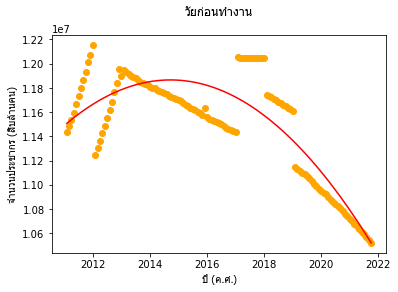

In [19]:
#bfw
plt.scatter(listtime,df_final.bfw_Actual,color = 'orange')
plt.plot(listtime,df_final.bfw_Predicted,color = 'red')
plt.title('วัยก่อนทำงาน\n',fontname='Tahoma')
plt.ylabel('จำนวนประชากร (สิบล้านคน)',fontname='Tahoma')
plt.xlabel('ปี (ค.ศ.)',fontname='Tahoma')
plt.show()

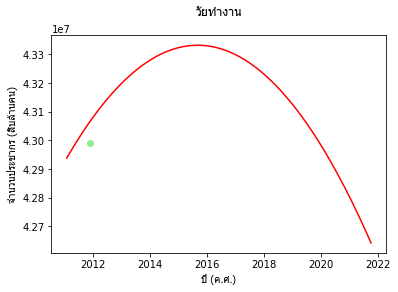

In [20]:
#w
plt.scatter(listtime,df_final.w_Actual,color = 'lightgreen')
plt.plot(listtime,df_final.w_Predicted,color = 'red')
plt.title('วัยทำงาน\n',fontname='Tahoma')
plt.ylabel('จำนวนประชากร (สิบล้านคน)',fontname='Tahoma')
plt.xlabel('ปี (ค.ศ.)',fontname='Tahoma')
plt.show()

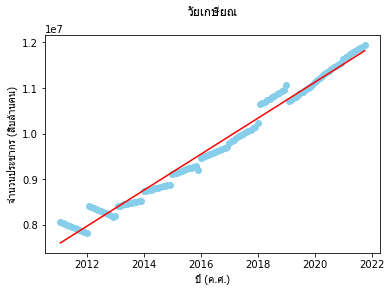

In [ ]:
#rt
plt.scatter(listtime,df_final.rt_Actual,color = 'skyblue')
plt.plot(listtime,df_final.rt_Predicted,color = 'red')
plt.title('วัยเกษียณ\n',fontname='Tahoma')
plt.ylabel('จำนวนประชากร (สิบล้านคน)',fontname='Tahoma')
plt.xlabel('ปี (ค.ศ.)',fontname='Tahoma')
plt.show()

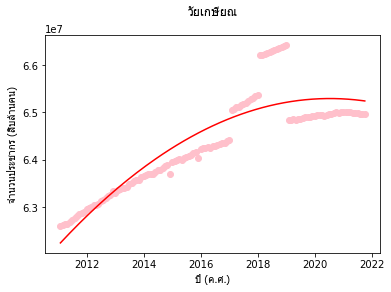

In [ ]:
#total
plt.scatter(listtime,df_final.total_Actual,color = 'pink')
plt.plot(listtime,df_final.total_Predicted,color = 'red')
plt.title('วัยเกษียณ\n',fontname='Tahoma')
plt.ylabel('จำนวนประชากร (สิบล้านคน)',fontname='Tahoma')
plt.xlabel('ปี (ค.ศ.)',fontname='Tahoma')
plt.show()